In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
import sklearn
import matplotlib
import warnings

warnings.filterwarnings('ignore')



# Importar Dados

In [2]:
df_original = pd.read_csv('../datasets/online_shoppers.csv')
df_original.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


Dicionário de Dados:

"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra.

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico.

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão.

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página.

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico.

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro.

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.


# Análise Exploratória

In [3]:
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
df_original.shape

(12330, 18)

In [5]:
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer

# Inputando valores para não perder amostras.
my_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df_original.iloc[:, 0:8]

imputed_X = pd.DataFrame(my_imputer.fit_transform(X))
imputed_X.columns = df_original.iloc[:, 0:8].columns

In [7]:
df_original.iloc[:, 0:8] = imputed_X

In [8]:
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [9]:
df = df_original.copy()

continuous = []
categorical = []

for c in df.columns[:-1]:
  if df.nunique()[c] >= 30:
    continuous.append(c)
  else:
    categorical.append(c)

In [10]:
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9553
BounceRates                1873
ExitRates                  4778
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [11]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [12]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [13]:
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [14]:
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


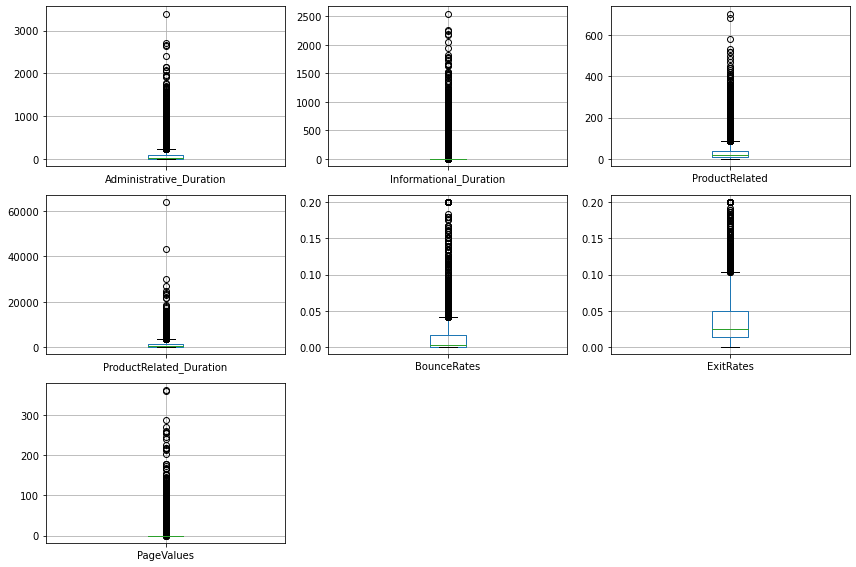

In [15]:
fig = plt.figure(figsize=(12,8))

for i, col in enumerate(continuous):
  plt.subplot(3,3, i + 1);
  df.boxplot(col)
  plt.tight_layout()

## Matriz de Correlação entre variáveis contínuas

<AxesSubplot:>

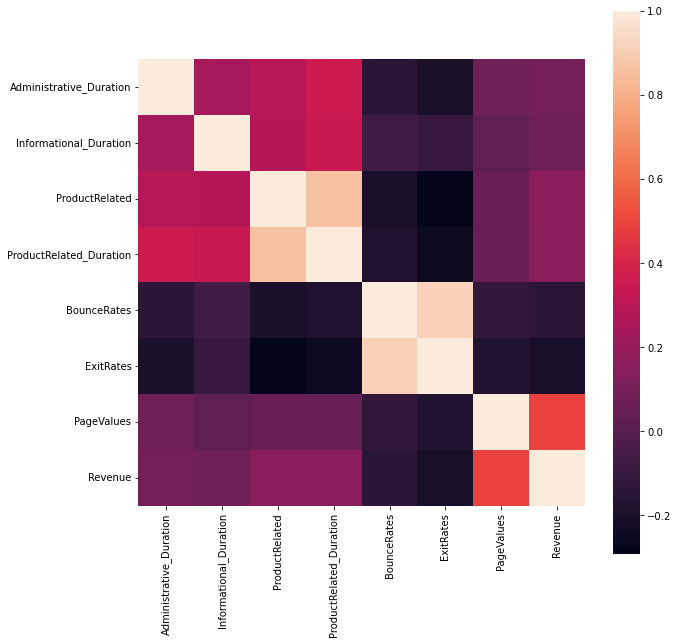

In [16]:
plt.figure(figsize=(10,10))

sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',
                'ProductRelated',
                'ProductRelated_Duration',
                'BounceRates',
                'ExitRates',
                'PageValues',
                'Revenue']].corr(), vmax=1., square=True)

In [17]:
df[['Administrative_Duration',
                'Informational_Duration',
                'ProductRelated',
                'ProductRelated_Duration',
                'BounceRates',
                'ExitRates',
                'PageValues',
                'Revenue']].corr()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
Administrative_Duration,1.000000,0.238042,0.288971,0.355330,-0.143918,-0.205410,0.067601,0.093576
Informational_Duration,0.238042,1.000000,0.280027,0.347356,-0.073958,-0.105090,0.030872,0.070360
ProductRelated,0.288971,0.280027,1.000000,0.860883,-0.204302,-0.292052,0.056172,0.158405
ProductRelated_Duration,0.355330,0.347356,0.860883,1.000000,-0.184244,-0.251481,0.052729,0.152258
BounceRates,-0.143918,-0.073958,-0.204302,-0.184244,1.000000,0.913450,-0.119198,-0.150401
ExitRates,-0.205410,-0.105090,-0.292052,-0.251481,0.913450,1.000000,-0.174241,-0.206669
PageValues,0.067601,0.030872,0.056172,0.052729,-0.119198,-0.174241,1.000000,0.492569
Revenue,0.093576,0.070360,0.158405,0.152258,-0.150401,-0.206669,0.492569,1.000000


<AxesSubplot:title={'center':'Venda ou Não'}, xlabel='Revenue', ylabel='count'>

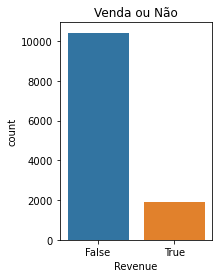

In [18]:
plt.subplot(1,2,2)
plt.title("Venda ou Não")
sns.countplot(df['Revenue'])

## Pré-processamento dos Dados

In [19]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [20]:
df_original['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [21]:
lb = LabelEncoder()

df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

df_original.dropna(inplace=True)

df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [22]:
#!pip install imblearn

Note: you may need to restart the kernel to use updated packages.


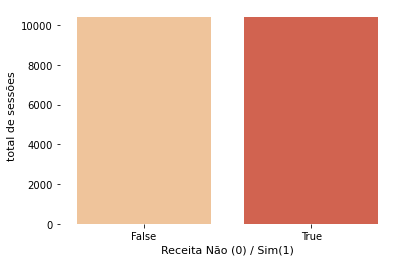

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

seed = 10

X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

smote_bal = SMOTE(random_state = seed)

X_res, y_res = smote_bal.fit_resample(X, y)

X = X_res
y = y_res

sns.countplot(y_res, palette='OrRd')
plt.box(False)
plt.xlabel("Receita Não (0) / Sim(1)", fontsize=11)
plt.ylabel("total de sessões", fontsize=11)
plt.show()

In [24]:
print(X.shape)
print(y.shape)

(20844, 17)
(20844,)


In [25]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=40)

In [26]:
X_treino.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
18352,5.115833,416.839709,0.0,0.0,13.768333,361.442618,0.022032,0.021774,3.568691,0.0,2,2,2,3,2,2,True
8499,1.000000,12.000000,0.0,0.0,99.000000,4097.708838,0.002062,0.013746,0.000000,0.0,7,2,2,3,2,2,False
7101,3.000000,79.933333,0.0,0.0,17.000000,348.850000,0.000000,0.023684,0.000000,0.0,7,2,2,1,20,2,False
9829,3.000000,159.166667,2.0,8.0,69.000000,2766.942172,0.002817,0.028665,5.931333,0.0,1,2,2,1,2,2,False
4304,0.000000,0.000000,0.0,0.0,13.000000,365.750000,0.000000,0.030769,0.000000,1.0,6,3,2,3,4,2,True


In [27]:
# Padronizar
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.fit_transform(X_teste)

X_scaled = sc.fit_transform(X)

In [28]:
X_treino_scaled

array([[ 0.72323579,  1.87454811, -0.45488378, ..., -0.50783228,
         0.54126432,  1.43660667],
       [-0.50627326, -0.45671036, -0.45488378, ..., -0.50783228,
         0.54126432, -0.69608475],
       [ 0.09118002, -0.0655181 , -0.45488378, ...,  4.36170599,
         0.54126432, -0.69608475],
       ...,
       [-0.8049999 , -0.52581203, -0.45488378, ..., -0.50783228,
        -2.07192114,  1.43660667],
       [ 2.17841984,  3.7170626 ,  0.17310614, ..., -0.50783228,
         0.54126432, -0.69608475],
       [-0.50627326, -0.4207199 , -0.45488378, ...,  0.57428733,
         0.54126432, -0.69608475]])

In [29]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(C=11, gamma=0.08, random_state=42)
scores = cross_val_score(clf, X_scaled, y, cv=12)

print("MEAN: {0:.2g}; STD: {1:.2g} ".format(scores.mean(), scores.std()))

MEAN: 0.9; STD: 0.03 


In [30]:
# Testando hiperparametros
for i in range (1, 13):
  for j in range(1, 13):
    
    c = i
    gamma = j / 100
    
    model = svm.SVC(C=c, gamma=gamma, random_state=42)
    
    model.fit(X_treino_scaled, y_treino)
    
    train_preds = model.predict(X_treino_scaled)
    test_preds = model.predict(X_teste_scaled)
    
    SVM_dic_metrics = {'train_accuracy_score': np.round(accuracy_score(train_preds, y_treino), decimals=3) * 100,
                   'test_accuracy_score': np.round(accuracy_score(test_preds, y_teste), decimals=3) * 100}

    if(SVM_dic_metrics['train_accuracy_score'] > 90 and SVM_dic_metrics['test_accuracy_score'] >= 90):
      print("C = {0}, gamma = {1}, train_accuracy = {2}, test_accuracy = {3} ".format(i, gamma, SVM_dic_metrics['train_accuracy_score'], SVM_dic_metrics['test_accuracy_score']))

    

C = 5, gamma = 0.12, train_accuracy = 94.3, test_accuracy = 90.10000000000001 
C = 6, gamma = 0.12, train_accuracy = 94.5, test_accuracy = 90.10000000000001 
C = 7, gamma = 0.1, train_accuracy = 94.1, test_accuracy = 90.0 
C = 7, gamma = 0.11, train_accuracy = 94.39999999999999, test_accuracy = 90.10000000000001 
C = 7, gamma = 0.12, train_accuracy = 94.89999999999999, test_accuracy = 90.10000000000001 
C = 8, gamma = 0.09, train_accuracy = 93.89999999999999, test_accuracy = 90.0 
C = 8, gamma = 0.1, train_accuracy = 94.3, test_accuracy = 90.0 
C = 8, gamma = 0.11, train_accuracy = 94.69999999999999, test_accuracy = 90.10000000000001 
C = 8, gamma = 0.12, train_accuracy = 95.1, test_accuracy = 90.10000000000001 
C = 9, gamma = 0.09, train_accuracy = 94.1, test_accuracy = 90.10000000000001 
C = 9, gamma = 0.1, train_accuracy = 94.5, test_accuracy = 90.10000000000001 
C = 9, gamma = 0.11, train_accuracy = 94.89999999999999, test_accuracy = 90.10000000000001 
C = 9, gamma = 0.12, train_ac

In [31]:
model = svm.SVC(C=11, gamma=0.08, random_state=42)

### Treino

In [32]:
 model.fit(X_treino_scaled, y_treino)

SVC(C=11, gamma=0.08, random_state=42)

In [33]:
previsao = model.predict(X_treino_scaled)

In [34]:
SVM_dic_metrics_train = {'accuracy_score': accuracy_score(previsao, y_treino),
                   'confusion_matrix': confusion_matrix(previsao, y_treino)}

print('Accuracy {0:.3g} % '.format(SVM_dic_metrics_train['accuracy_score'] * 100))

Accuracy 93.9 % 


In [35]:
SVM_dic_metrics_train['confusion_matrix']

array([[6857,  508],
       [ 377, 6848]], dtype=int64)

In [36]:
print(classification_report(previsao, y_treino))

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      7365
        True       0.93      0.95      0.94      7225

    accuracy                           0.94     14590
   macro avg       0.94      0.94      0.94     14590
weighted avg       0.94      0.94      0.94     14590



### Teste

In [37]:
X_teste['Predicted'] = model.predict(X_teste_scaled)
X_teste['Original_Revenue'] = y_teste

In [38]:
SVM_dic_metrics_test = {'accuracy_score': accuracy_score(X_teste['Predicted'], y_teste),
                   'confusion_matrix': confusion_matrix(X_teste['Predicted'], y_teste)}

print('Accuracy {0:.3g} % '.format(SVM_dic_metrics_test['accuracy_score'] * 100))

Accuracy 90 % 


In [39]:
SVM_dic_metrics_test['confusion_matrix']

array([[2874,  309],
       [ 314, 2757]], dtype=int64)

In [40]:
print(classification_report(X_teste['Predicted'], y_teste))


              precision    recall  f1-score   support

       False       0.90      0.90      0.90      3183
        True       0.90      0.90      0.90      3071

    accuracy                           0.90      6254
   macro avg       0.90      0.90      0.90      6254
weighted avg       0.90      0.90      0.90      6254

